In [1]:
## imports

## basic imports
import numpy as np
import pandas as pd
import math
import scipy as sp
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

##keras
from keras import models
from keras import layers
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import regularizers

## lift curve
def mylift(y,p):
   """lift"""
   ii = np.argsort(p)[::-1]
   ps = np.cumsum(y[ii])/np.sum(y)
   return(ps)

In [2]:
## data

## Each obseration is a movie review
## y: binary, favorable or not
## x: text of moview review as represented by binary indictors of whether
##      a given term is in the review or not

np.random.seed(0)

#load data
nf=1000 # number of features = number of terms counted in each revies
(xtr,ytr), (xte,yte) = imdb.load_data(num_words=nf)

#create binary features
tkn = Tokenizer(num_words=nf)
Xtr = tkn.sequences_to_matrix(xtr,mode="binary")
Xte = tkn.sequences_to_matrix(xte,mode="binary")

## quick look at data
print("shape of x train: ",Xtr.shape)
print("shape of x test: ",Xte.shape)
print("shape of y train: ",ytr.shape)
print("shape of y test: ",yte.shape)
ntr = len(ytr)
nte = len(yte)

#distribution of ytr
pd.Series(ytr).value_counts()/ntr
#distribution of yte
pd.Series(yte).value_counts()/ntr

#X is all 0's and 1's
Xtr[0:20,0:5]
pd.Series(Xtr[:,4]).value_counts()
pd.Series(Xtr.reshape((nf*ntr,))).value_counts()

## since all the x's are binary, we do not have to standardise !!!

17473536/17464789 [==============================] - 1s 0us/step
shape of x train:  (25000, 1000)
shape of x test:  (25000, 1000)
shape of y train:  (25000,)
shape of y test:  (25000,)


0.0    22635869
1.0     2364131
dtype: int64

In [8]:
(xtr,ytr), (xte,yte) = imdb.load_data(num_words=nf)
xtr[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [3]:
### fit neural net model

## make model in keras, two hidden layers, each with 16 units, relu activation.
## final output layer is sigmoid to get a logit like fit.
#nn
l2p=.1 #L2 penalty
nmod = models.Sequential()
nmod.add(layers.Dense(units=16,activation="relu",kernel_regularizer=regularizers.l2(l2p),input_shape=(nf,)))
nmod.add(layers.Dense(units=16,activation="relu",kernel_regularizer=regularizers.l2(l2p)))
nmod.add(layers.Dense(units=1,activation="sigmoid"))

#compile
# binary_crossentropy is similar to deviance loss, will also keep track of acc=%correct
nmod.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

#fit
nhist = nmod.fit(Xtr,ytr,epochs=50,verbose=1,batch_size=100,validation_data=(Xte,yte))

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 1.5309 - accuracy: 0.7483 - val_loss: 0.7807 - val_accuracy: 0.7589
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.8100 - val_loss: 0.6449 - val_accuracy: 0.7557
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 0.8207 - val_loss: 0.5784 - val_accuracy: 0.8369
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.8343 - val_loss: 0.5624 - val_accuracy: 0.8302
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5491 - accuracy: 0.8342 - val_loss: 0.5373 - val_accuracy: 0.8416
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5319 - accuracy: 0.8408 - val_loss: 0.5240 - val_accuracy: 0.8428
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.5172 - accuracy: 0.8445 - val_loss: 0.5177 - val_accuracy: 0.8398
Epoch 

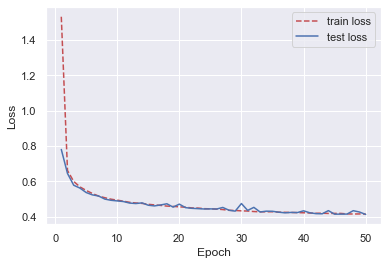

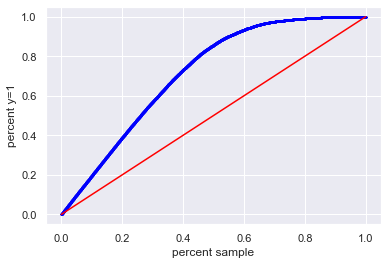

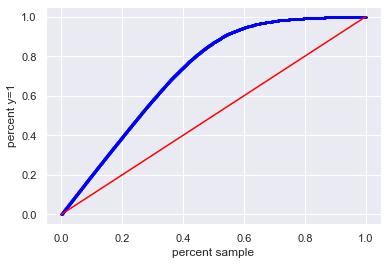

In [4]:
#plot loss versus epoch number
trL = nhist.history["loss"]
teL = nhist.history["val_loss"]

epind = range(1,len(teL)+1)
plt.plot(epind,trL,"r--")
plt.plot(epind,teL,"b-")
plt.legend(["train loss","test loss"])
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.show()

#lift on test
phatte = nmod.predict(Xte)[:,0]
nte = len(yte)
pvec = np.linspace(1,nte,nte)/nte
plt.scatter(pvec,mylift(yte,phatte),s=.5,c='blue')
plt.xlabel('percent sample'); plt.ylabel('percent y=1')
plt.plot(pvec,pvec,c='red')
plt.show()

#lift on train
phattr = nmod.predict(Xtr)[:,0]
ntr = len(ytr)
pvec = np.linspace(1,ntr,ntr)/ntr
plt.scatter(pvec,mylift(ytr,phattr),s=.5,c='blue')
plt.xlabel('percent sample'); plt.ylabel('percent y=1')
plt.plot(pvec,pvec,c='red')
plt.show()
